<a href="https://colab.research.google.com/github/Karolin-Auxilia/SCT_ML_4/blob/main/Hand_gesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/aryarishabh/hand-gesture-recognition-dataset
License(s): CC0-1.0
  0% 0.00/37.6M [00:00<?, ?B/s]
100% 37.6M/37.6M [00:00<00:00, 1.08GB/s]
Found 18000 images belonging to 20 classes.
Found 6000 images belonging to 20 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.2187 - loss: 2.7880 - val_accuracy: 0.4844 - val_loss: 2.1270
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3958 - loss: 2.2770
✅ Quick Test Accuracy: 37.50%


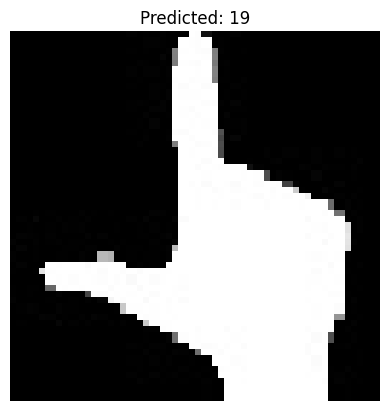

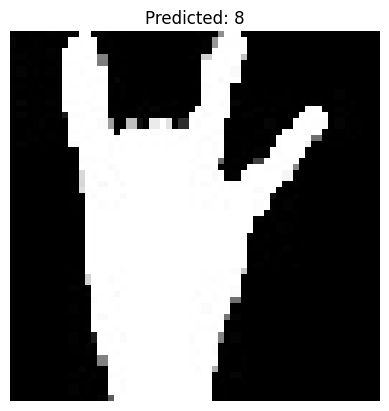

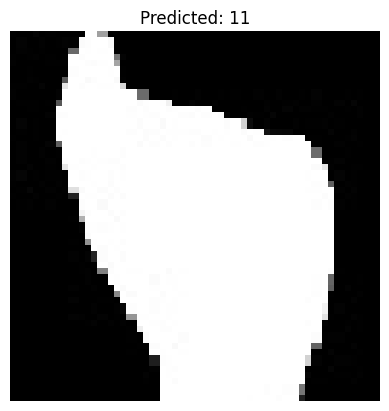

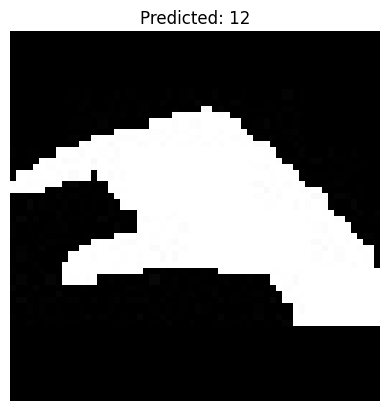

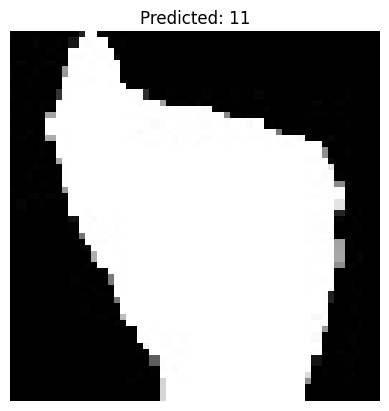

In [2]:
!pip install kaggle opencv-python matplotlib --quiet

import os
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

if not os.path.exists("dataset"):
    !kaggle datasets download -d aryarishabh/hand-gesture-recognition-dataset
    !unzip -q hand-gesture-recognition-dataset.zip -d dataset

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "dataset/train/train"
test_dir = "dataset/test/test"

img_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

num_classes = train_data.num_classes

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=1,
    steps_per_epoch=5,
    validation_steps=2
)

loss, acc = model.evaluate(test_data, steps=2)
print(f"✅ Quick Test Accuracy: {acc*100:.2f}%")

import numpy as np
from tensorflow.keras.preprocessing import image
import random
import matplotlib.pyplot as plt

class_labels = list(train_data.class_indices.keys())

for i in range(5):
    sample_class = random.choice(os.listdir(test_dir))
    class_path = os.path.join(test_dir, sample_class)
    sample_image = os.path.join(class_path, random.choice(os.listdir(class_path)))

    img = image.load_img(sample_image, target_size=img_size)
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(prediction)

    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.axis("off")
    plt.show()
